### Clean missing values by dropping, feed forward, and median

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

In [2]:
csv_data = pd.read_csv('SP500_Index_Data_with_Added_Features.csv')
# csv_data = pd.read_csv('SP500_Index_Data_with_Added_Features.csv')

csv_data['Date'] = pd.to_datetime(csv_data['Date'], format="%Y-%m-%d") #Date column to datetime
csv_data = csv_data.sort_values(by='Date', ascending=True).reset_index(drop=True) #dates sorted to better visualize output
#csv_data.drop(['USD_FF_mktcap'],axis=1,inplace=True) #drop columns we don't need

csv_data

,Date,Ticker,Name,Sector,Price,Price_Returns_12m,Price_Returns_6m,Price_Returns_3m,Price_Returns_1m,Moving_Avg_Returns_12m,...,PB,Trail_EV_EBITDA,Trail_PE,Trail3yrAvg_EPSgro,Trail3yrAvg_DPSgro,Volatility,Debt_to_MktCap,NetDebt_EBITDA,Trail1yr_EPSgro,Trail1yr_DPSgro
0,2000-12-31,VTSS,MICROCHIP COMMUN,Information Technology,1106.2500,0.054827,NaN,NaN,0.282609,NaN,...,8.6338,36.6065,80.1630,66.4983,0.0000,114.207,0.0721,-0.1106,NaN,NaN
1,2000-12-31,SBUX,STARBUCKS CORP,Consumer Discretionary,5.5313,0.824742,NaN,NaN,-0.028807,NaN,...,6.8217,23.1059,158.0357,5.6305,0.0000,62.124,0.0078,-0.4568,NaN,NaN
2,2000-12-31,AAMRQ,AMR CORP,Industrials,39.1875,0.307889,NaN,NaN,0.171963,NaN,...,0.8304,NaN,8.4821,-46.7452,0.0000,51.599,1.0618,1.5629,NaN,NaN
3,2000-12-31,EHC,ENCOMPASS HEALTH,Health Care,81.5625,2.034884,NaN,NaN,0.170404,NaN,...,NaN,NaN,NaN,NaN,0.0000,68.515,NaN,NaN,NaN,NaN
4,2000-12-31,MDR,MCDERMOTT INTL,Energy,NaN,0.198454,NaN,NaN,0.194444,NaN,...,0.4328,12.0836,20.5509,NaN,-9.1440,68.622,0.6455,3.8149,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123863,2021-06-30,CAT,CATERPILLAR INC,Industrials,217.6300,0.761033,0.207364,-0.057212,-0.097271,0.050253,...,7.1930,17.1504,28.9312,11.3307,9.7103,29.043,0.3203,-0.0960,-8.884663,-0.000606
123864,2021-06-30,BA,BOEING CO/THE,Industrials,239.5600,0.306928,0.119126,-0.059516,-0.030200,0.033708,...,NaN,NaN,NaN,-51.6859,0.0000,46.282,0.4538,NaN,-1017.543264,-100.000000
123865,2021-06-30,AVGO,BROADCOM INC,Information Technology,476.8400,0.561110,0.105814,0.036395,0.017371,0.039096,...,9.6650,17.2061,40.4239,23.7943,30.8588,30.250,0.2067,2.3997,79.762268,13.307170
123866,2021-06-30,HPQ,HP INC,Information Technology,30.1900,0.784808,0.243512,-0.043076,0.039423,0.054327,...,NaN,8.3812,10.0154,10.3833,11.2247,31.150,0.2017,0.7268,26.125523,9.986824


## Row Removal
Removing rows that didn't make sense to continue including
 * 2001
 * Stock Prices that are NaN
 * Stock 1 Month Performance that are NaN

In [3]:
print(csv_data.columns.to_list())

['Date', 'Ticker', 'Name', 'Sector', 'Price', 'Price_Returns_12m', 'Price_Returns_6m', 'Price_Returns_3m', 'Price_Returns_1m', 'Moving_Avg_Returns_12m', 'Moving_Avg_Returns_6m', 'Moving_Avg_Returns_3m', 'Trail_DivYld', 'PB', 'Trail_EV_EBITDA', 'Trail_PE', 'Trail3yrAvg_EPSgro', 'Trail3yrAvg_DPSgro', 'Volatility', 'Debt_to_MktCap', 'NetDebt_EBITDA', 'Trail1yr_EPSgro', 'Trail1yr_DPSgro']


In [4]:


feature_list = ['Price_Returns_12m', 'Price_Returns_6m', 'Price_Returns_3m', 'Price_Returns_1m', 'Moving_Avg_Returns_12m', 'Moving_Avg_Returns_6m', 'Moving_Avg_Returns_3m', 'Trail_DivYld', 'PB', 'Trail_EV_EBITDA', 'Trail_PE', 'Trail3yrAvg_EPSgro', 'Trail3yrAvg_DPSgro', 'Volatility', 'Debt_to_MktCap', 'NetDebt_EBITDA', 'Trail1yr_EPSgro', 'Trail1yr_DPSgro'] #['Trail3yrAvg_EPSgro']#

### starting point information
df = csv_data.copy() 
row_count1 = len(df) #number of rows
nan_count1 = df.isna().sum() #number of NaN's by column
nan_percent1 = (df.isna().sum() / len(df) )*100 #Percentage of NaN's by column
data_total1 = df[feature_list].count().sum() #total data points
nan_total1 = df[feature_list].isna().sum().sum() #total NaN's
#print(nan_total1, data_total1)

### Remove 2001, as the additional features we engineered (1 year EPS and Dividend Growth) calc's are all NaN's for the first 12 months of our dataset
df = df[df['Date'] >= '2001-12-31'].copy()
df = df.reset_index(drop=True)
row_count2 = len(df) #number of rows
nan_count2 = df.isna().sum() #number of NaN's by column
nan_percent2 = (df.isna().sum() / len(df) )*100 #Percentage of NaN's by column
data_total2 = df[feature_list].count().sum() #total data points
nan_total2 = df[feature_list].isna().sum().sum() #total NaN's

### Take out NaN's in the Price Column (if a stock doesn't exist at the end of the month, we cannot analyze it)
df = df[~df['Price'].isna()].copy()
row_count3 = len(df) #number of rows
nan_count3 = df.isna().sum() #number of NaN's by column
nan_percent3 = (df.isna().sum() / len(df) )*100 #Percentage of NaN's by column
data_total3 = df[feature_list].count().sum() #total data points
nan_total3 = df[feature_list].isna().sum().sum() #total NaN's

### Remove NaN's from Local_Returns_1m (small number of these after cleaning the Price column, so it felt appropriate)
df = df[~df['Price_Returns_1m'].isna()].copy()
row_count4 = len(df) #number of rows
nan_count4 = df.isna().sum() #number of NaN's by column
nan_percent4 = (df.isna().sum() / len(df) )*100 #Percentage of NaN's by column
data_total4 = df[feature_list].count().sum() #total data points
nan_total4 = df[feature_list].isna().sum().sum() #total NaN's

### Summary Tables

datapoint_total = pd.DataFrame(np.array([data_total1, data_total2, data_total3, data_total4, data_total4-data_total1]).reshape(1,-1), 
                           columns=['Datapoints at the start','Datapoints after 2000 removal', 'Datapoints after Price clean','Datapoints after 1m Return clean','Total Change in Datapoints'],
                           index=['Num of Datapoints']
                           )

NaNpoints_total = pd.DataFrame(np.array([nan_total1, nan_total2, nan_total3, nan_total4, nan_total4-nan_total1]).reshape(1,-1), 
                           columns=['NaN-points at the start','NaN-points after 2000 removal', 'NaN-points after Price clean','NaN-points after 1m Return clean','Total Change in NaN-points'],
                           index=['Num of NaN-points']
                           )



NaNpercent_total = pd.DataFrame(np.array([100*(nan_total1/(data_total1+nan_total1)), 100*(nan_total2/(data_total2+nan_total2)), 100*(nan_total3/(data_total3+nan_total3)), 100*(nan_total4/(data_total4+nan_total4))]).reshape(1,-1), 
                           columns=['NaN % at the start','NaN  % after 2000 removal', 'NaN  % after Price clean','NaN % after 1m Return clean'],
                           index=['NaN-Percentage %']
                           )

row_total = pd.DataFrame(np.array([row_count1, row_count2, row_count3, row_count4, row_count4-row_count1]).reshape(1,-1), 
                           columns=['Rows at the start','Rows after 2000 removal', 'Rows after Price clean','Rows after 1m Return clean','Total Change in Rows'],
                           index=['Num of Rows']
                           )

nan_summary = pd.concat([nan_count1, nan_count2, nan_count3, nan_count4], axis=1)
nan_summary.columns = ['NaN # at the start','NaN # after 2001 removal', 'NaN # after Price clean','NaN # after 1m Return clean']
nan_summary['Change in NaNs from row removal'] = nan_count4 - nan_count1

nan_percent_summary = pd.concat([nan_percent1, nan_percent2, nan_percent3, nan_percent4], axis=1)
nan_percent_summary.columns = ['NaN % at the start','NaN % after 2001 removal', 'NaN % after Price clean','NaN % after 1m Return clean']

display(row_total)
display(datapoint_total)
display(NaNpoints_total)
display(NaNpercent_total)
print('')
display(nan_percent_summary)
print('')
display(nan_summary)

,Rows at the start,Rows after 2000 removal,Rows after Price clean,Rows after 1m Return clean,Total Change in Rows
Num of Rows,123868,117868,113354,113318,-10550


,Datapoints at the start,Datapoints after 2000 removal,Datapoints after Price clean,Datapoints after 1m Return clean,Total Change in Datapoints
Num of Datapoints,2099746,2021246,1955210,1954989,-144757


,NaN-points at the start,NaN-points after 2000 removal,NaN-points after Price clean,NaN-points after 1m Return clean,Total Change in NaN-points
Num of NaN-points,129878,100378,85162,84735,-45143


,NaN % at the start,NaN % after 2000 removal,NaN % after Price clean,NaN % after 1m Return clean
NaN-Percentage %,5.825108,4.731187,4.173847,4.154239


,NaN % at the start,NaN % after 2001 removal,NaN % after Price clean,NaN % after 1m Return clean
Date,0.000000,0.000000,0.000000,0.000000
Ticker,0.000000,0.000000,0.000000,0.000000
Name,0.180030,0.179014,0.000000,0.000000
Sector,0.000000,0.000000,0.000000,0.000000
Price,3.829076,3.829708,0.000000,0.000000
Price_Returns_12m,1.053541,1.035905,0.922773,0.904534
Price_Returns_6m,4.126974,2.141378,2.008751,1.977621
Price_Returns_3m,1.751058,0.945973,0.820439,0.788930
Price_Returns_1m,0.150967,0.153562,0.031759,0.000000
Moving_Avg_Returns_12m,8.790002,4.550005,4.398610,4.368238


,NaN # at the start,NaN # after 2001 removal,NaN # after Price clean,NaN # after 1m Return clean,Change in NaNs from row removal
Date,0,0,0,0,0
Ticker,0,0,0,0,0
Name,223,211,0,0,-223
Sector,0,0,0,0,0
Price,4743,4514,0,0,-4743
Price_Returns_12m,1305,1221,1046,1025,-280
Price_Returns_6m,5112,2524,2277,2241,-2871
Price_Returns_3m,2169,1115,930,894,-1275
Price_Returns_1m,187,181,36,0,-187
Moving_Avg_Returns_12m,10888,5363,4986,4950,-5938


## Filling Forward data points for any "gaps" of data, using a window size of *n*
A "gap" is when a stock feature has data, then turns into NaN's, then has data again

In [5]:
print(df.columns.to_list())

['Date', 'Ticker', 'Name', 'Sector', 'Price', 'Price_Returns_12m', 'Price_Returns_6m', 'Price_Returns_3m', 'Price_Returns_1m', 'Moving_Avg_Returns_12m', 'Moving_Avg_Returns_6m', 'Moving_Avg_Returns_3m', 'Trail_DivYld', 'PB', 'Trail_EV_EBITDA', 'Trail_PE', 'Trail3yrAvg_EPSgro', 'Trail3yrAvg_DPSgro', 'Volatility', 'Debt_to_MktCap', 'NetDebt_EBITDA', 'Trail1yr_EPSgro', 'Trail1yr_DPSgro']


In [6]:
%%time

df=df.copy()

#print(df.columns.to_list())

feature_list = ['Trail_DivYld', 'PB', 'Trail_EV_EBITDA', 'Trail_PE', 'Trail3yrAvg_EPSgro', 'Trail3yrAvg_DPSgro', 'Volatility', 'Debt_to_MktCap', 'NetDebt_EBITDA', 'Trail1yr_EPSgro', 'Trail1yr_DPSgro'] #['Trail3yrAvg_EPSgro']#
#feature_list = ['Trail3yrAvg_EPSgro']

basic_column_list = ['Date', 'Ticker', 'Name', 'Sector', 'Price', 'Price_Returns_12m', 'Price_Returns_6m', 'Price_Returns_3m', 'Price_Returns_1m', 'Moving_Avg_Returns_12m', 'Moving_Avg_Returns_6m', 'Moving_Avg_Returns_3m',]

def fill_the_gap( basic_column_list=basic_column_list, feature_list=feature_list, df=df.copy(), n=2):

    df = df.copy()
    gap_count = 0
    #print(df.columns.to_list())
    
    filled_df = df[basic_column_list].copy() #starting point to re-build the df

    for feature in feature_list:
        print('Starting to gap fill...',feature)
        cols_to_keep = basic_column_list.copy()
        cols_to_keep.append(feature)
        #print(cols_to_keep)
        feature_df = df[cols_to_keep].copy()
        #display(feature_df)
        feature_df['backward_shift'] = feature_df.groupby(['Ticker'],axis=0)[feature].shift(n)
        feature_df['forward_shift'] = feature_df.groupby(['Ticker'],axis=0)[feature].shift(-n)
        feature_df['gap_count'] = feature_df.apply(lambda x: 1 if (  (np.isnan(x[feature])) & (~np.isnan(x['backward_shift'])) & (~np.isnan(x['forward_shift']))  ) else 
                                        0,
                                        axis=1)
        gap_count += feature_df['gap_count'].sum()

        feature_df[feature] = feature_df.apply(lambda x:  x['backward_shift'] if (  (np.isnan(x[feature])) & (~np.isnan(x['backward_shift'])) & (~np.isnan(x['forward_shift']))  ) else 
                                        x[feature], 
                                        axis=1)
        feature_df.drop(['backward_shift','forward_shift','gap_count'],axis=1,inplace=True)
        #feature_df.drop(['backward_shift','forward_shift'],axis=1,inplace=True)

        filled_df = filled_df.merge(feature_df, how='left', on=basic_column_list)
        del feature_df


    #display(filled_df[filled_df.Ticker=='KHC'].iloc[40:60]) #use when testing single ticker (KHC)

    print('')
    print('window size: ',n,'recovered number of datapoints:  ', gap_count)
    print('')
    return filled_df 


filled_df = fill_the_gap()
#display(filled_df)



Starting to gap fill... Trail_DivYld
Starting to gap fill... PB
Starting to gap fill... Trail_EV_EBITDA
Starting to gap fill... Trail_PE
Starting to gap fill... Trail3yrAvg_EPSgro
Starting to gap fill... Trail3yrAvg_DPSgro
Starting to gap fill... Volatility
Starting to gap fill... Debt_to_MktCap
Starting to gap fill... NetDebt_EBITDA
Starting to gap fill... Trail1yr_EPSgro
Starting to gap fill... Trail1yr_DPSgro

window size:  2 recovered number of datapoints:   3085

CPU times: user 1min 7s, sys: 1.75 s, total: 1min 9s
Wall time: 1min 10s


In [7]:
#filled_df[filled_df.Ticker=='KHC'].iloc[40:60] #use when testing single ticker (KHC example)

In [8]:
### Look at how the above tables changed with gap-filling


feature_list = ['Price_Returns_12m', 'Price_Returns_6m', 'Price_Returns_3m', 'Price_Returns_1m', 'Moving_Avg_Returns_12m', 'Moving_Avg_Returns_6m', 'Moving_Avg_Returns_3m', 'Trail_DivYld', 'PB', 'Trail_EV_EBITDA', 'Trail_PE', 'Trail3yrAvg_EPSgro', 'Trail3yrAvg_DPSgro', 'Volatility', 'Debt_to_MktCap', 'NetDebt_EBITDA', 'Trail1yr_EPSgro', 'Trail1yr_DPSgro'] #['Trail3yrAvg_EPSgro']#


### Analysis of filled_df

row_count5 = len(filled_df) #number of rows
nan_count5 = filled_df.isna().sum() #number of NaN's by column
nan_percent5 = (filled_df.isna().sum() / len(filled_df) )*100 #Percentage of NaN's by column
data_total5 = filled_df[feature_list].count().sum() #total data points
nan_total5 = filled_df[feature_list].isna().sum().sum() #total NaN's

### Summary Tables

datapoint_total = pd.DataFrame(np.array([data_total1, data_total2, data_total3, data_total4, data_total5 ]).reshape(1,-1), 
                           columns=['Datapoints at the start','Datapoints after 2000 removal', 'Datapoints after Price clean','Datapoints after 1m Return clean','Datapoints after Filling Gaps'],
                           index=['Num of Datapoints']
                           )

NaNpoints_total = pd.DataFrame(np.array([nan_total1, nan_total2, nan_total3, nan_total4, nan_total5]).reshape(1,-1), 
                           columns=['NaN-points at the start','NaN-points after 2000 removal', 'NaN-points after Price clean','NaN-points after 1m Return clean','NaN-points after Filling Gaps'],
                           index=['Num of NaN-points']
                           )



NaNpercent_total = pd.DataFrame(np.array([100*(nan_total1/(data_total1+nan_total1)), 100*(nan_total2/(data_total2+nan_total2)), 100*(nan_total3/(data_total3+nan_total3)), 100*(nan_total4/(data_total4+nan_total4)), 100*(nan_total5/(data_total5+nan_total5))]).reshape(1,-1), 
                           columns=['NaN % at the start','NaN  % after 2000 removal', 'NaN  % after Price clean','NaN % after 1m Return clean','NaN % after Filling Gaps'],
                           index=['NaN-Percentage %']
                           )

row_total = pd.DataFrame(np.array([row_count1, row_count2, row_count3, row_count4, row_count5]).reshape(1,-1), 
                           columns=['Rows at the start','Rows after 2000 removal', 'Rows after Price clean','Rows after 1m Return clean','Rows after Filling Gaps'],
                           index=['Num of Rows']
                           )

nan_summary = pd.concat([nan_count1, nan_count2, nan_count3, nan_count4, nan_count5], axis=1)
nan_summary.columns = ['NaN # at the start','NaN # after 2001 removal', 'NaN # after Price clean', 'NaN # after 1m Return clean','NaN # after Filling Gaps']
#nan_summary['Change in NaNs from row removal'] = nan_count4 - nan_count1

nan_percent_summary = pd.concat([nan_percent1, nan_percent2, nan_percent3, nan_percent4, nan_percent5], axis=1)
nan_percent_summary.columns = ['NaN % at the start','NaN % after 2001 removal', 'NaN % after Price clean','NaN % after 1m Return clean', 'NaN % after Filling Gaps']

display(row_total)
display(datapoint_total)
display(NaNpoints_total)
display(NaNpercent_total)
print('')
display(nan_percent_summary)
print('')
display(nan_summary)

,Rows at the start,Rows after 2000 removal,Rows after Price clean,Rows after 1m Return clean,Rows after Filling Gaps
Num of Rows,123868,117868,113354,113318,113318


,Datapoints at the start,Datapoints after 2000 removal,Datapoints after Price clean,Datapoints after 1m Return clean,Datapoints after Filling Gaps
Num of Datapoints,2099746,2021246,1955210,1954989,1958074


,NaN-points at the start,NaN-points after 2000 removal,NaN-points after Price clean,NaN-points after 1m Return clean,NaN-points after Filling Gaps
Num of NaN-points,129878,100378,85162,84735,81650


,NaN % at the start,NaN % after 2000 removal,NaN % after Price clean,NaN % after 1m Return clean,NaN % after Filling Gaps
NaN-Percentage %,5.825108,4.731187,4.173847,4.154239,4.002993


,NaN % at the start,NaN % after 2001 removal,NaN % after Price clean,NaN % after 1m Return clean,NaN % after Filling Gaps
Date,0.000000,0.000000,0.000000,0.000000,0.000000
Ticker,0.000000,0.000000,0.000000,0.000000,0.000000
Name,0.180030,0.179014,0.000000,0.000000,0.000000
Sector,0.000000,0.000000,0.000000,0.000000,0.000000
Price,3.829076,3.829708,0.000000,0.000000,0.000000
Price_Returns_12m,1.053541,1.035905,0.922773,0.904534,0.904534
Price_Returns_6m,4.126974,2.141378,2.008751,1.977621,1.977621
Price_Returns_3m,1.751058,0.945973,0.820439,0.788930,0.788930
Price_Returns_1m,0.150967,0.153562,0.031759,0.000000,0.000000
Moving_Avg_Returns_12m,8.790002,4.550005,4.398610,4.368238,4.368238


,NaN # at the start,NaN # after 2001 removal,NaN # after Price clean,NaN # after 1m Return clean,NaN # after Filling Gaps
Date,0,0,0,0,0
Ticker,0,0,0,0,0
Name,223,211,0,0,0
Sector,0,0,0,0,0
Price,4743,4514,0,0,0
Price_Returns_12m,1305,1221,1046,1025,1025
Price_Returns_6m,5112,2524,2277,2241,2241
Price_Returns_3m,2169,1115,930,894,894
Price_Returns_1m,187,181,36,0,0
Moving_Avg_Returns_12m,10888,5363,4986,4950,4950


# Percent NA by Sector

#### Number of  Tickers in each sector

In [9]:
deeperDive_df = filled_df.copy()

,Avg. # Stocks by Sector
Sector,
Communication Services,24.714894
Consumer Discretionary,64.672340
Consumer Staples,36.608511
Energy,31.642553
Financials,65.829787
Health Care,55.331915
Industrials,58.480851
Information Technology,66.212766
Materials,29.174468


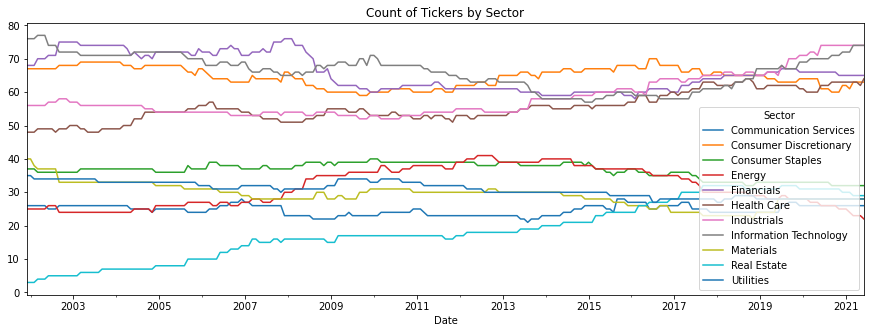

In [10]:
df = deeperDive_df.copy()

#print(df.columns.to_list())
cols = ['Date', 'Ticker', 'Name', 'Sector',]

df = df.groupby(by=['Date','Sector'])['Ticker'].count().reset_index()
#display(df)

df = df.pivot(index = 'Date', columns='Sector', values='Ticker')
#display(df)
display(pd.DataFrame(df.mean(), columns=['Avg. # Stocks by Sector']))

df.plot( figsize=(15,5), title='Count of Tickers by Sector');

#### Trail_EV_EBITDA

,Avg. NaNs % of total - Trail_EV_EBITDA
Sector,
Communication Services,5.910502
Consumer Discretionary,4.420201
Consumer Staples,4.350361
Energy,9.230885
Financials,64.171446
Health Care,4.977644
Industrials,3.348974
Information Technology,6.839944
Materials,3.182655


None

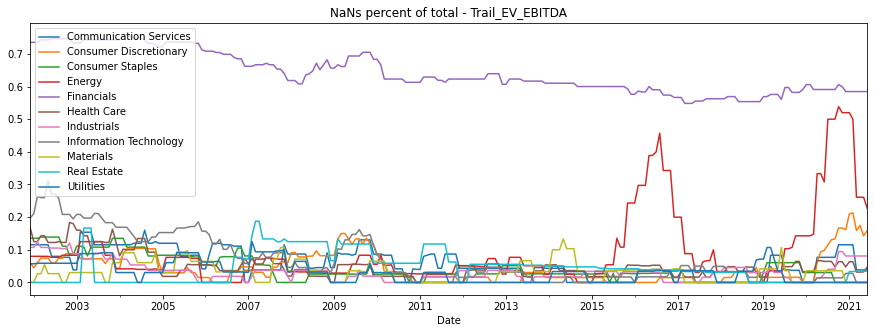

In [11]:
df = deeperDive_df.copy()

#print(df.columns.to_list())
feature = 'Trail_EV_EBITDA'
cols = ['Date', 'Ticker', 'Name', 'Sector',  feature]

df = df[cols]
df['NaN_percent'] = df.apply(lambda x: 1 if (np.isnan(x[feature])) else 0, axis=1)
#display(df)

df = df.groupby(by=['Date','Sector'])['NaN_percent'].mean().reset_index()

df = df.pivot(index = 'Date', columns='Sector', values='NaN_percent')
display(display(pd.DataFrame(df.mean()*100, columns=['Avg. NaNs % of total - {}'.format(feature)])))

df.plot( figsize=(15,5), title='NaNs percent of total - {}'.format(feature)).legend(loc='upper left');

#### NetDebt_EBITDA

,Avg. NaNs % of total - NetDebt_EBITDA
Sector,
Communication Services,6.100252
Consumer Discretionary,4.709863
Consumer Staples,4.589422
Energy,8.608973
Financials,64.172493
Health Care,4.042514
Industrials,3.500082
Information Technology,6.147737
Materials,3.363066


None

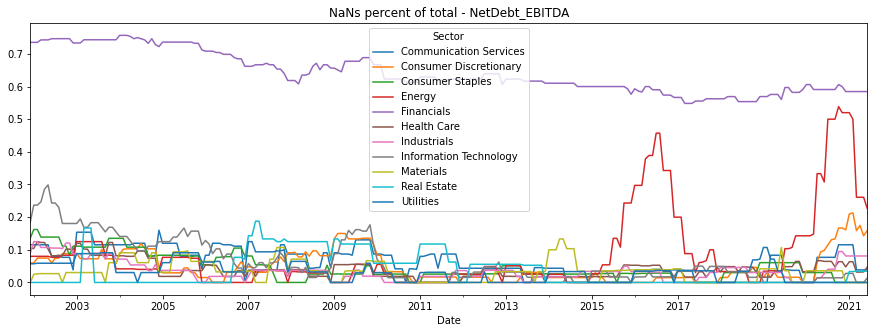

In [12]:
df = deeperDive_df.copy()

#print(df.columns.to_list())
feature = 'NetDebt_EBITDA'
cols = ['Date', 'Ticker', 'Name', 'Sector',  feature]

df = df[cols]
df['NaN_percent'] = df.apply(lambda x: 1 if (np.isnan(x[feature])) else 0, axis=1)
#display(df)

df = df.groupby(by=['Date','Sector'])['NaN_percent'].mean().reset_index()

df = df.pivot(index = 'Date', columns='Sector', values='NaN_percent')
display(display(pd.DataFrame(df.mean()*100, columns=['Avg. NaNs % of total - {}'.format(feature)])))

df.plot( figsize=(15,5), title='NaNs percent of total - {}'.format(feature));

#### Trail3yrAvg_EPSgro

,Avg. NaNs % of total - Trail3yrAvg_EPSgro
Sector,
Communication Services,16.388768
Consumer Discretionary,11.120371
Consumer Staples,5.047467
Energy,24.085300
Financials,12.139383
Health Care,5.709069
Industrials,4.889090
Information Technology,17.818202
Materials,13.647487


None

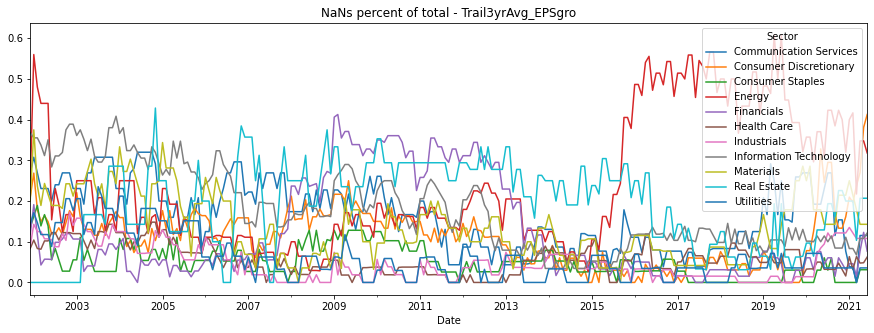

In [13]:
df = deeperDive_df.copy()

#print(df.columns.to_list())
feature = 'Trail3yrAvg_EPSgro'
cols = ['Date', 'Ticker', 'Name', 'Sector',  feature]

df = df[cols]
df['NaN_percent'] = df.apply(lambda x: 1 if (np.isnan(x[feature])) else 0, axis=1)
#display(df)

df = df.groupby(by=['Date','Sector'])['NaN_percent'].mean().reset_index()

df = df.pivot(index = 'Date', columns='Sector', values='NaN_percent')
display(display(pd.DataFrame(df.mean()*100, columns=['Avg. NaNs % of total - {}'.format(feature)])))

df.plot( figsize=(15,5), title='NaNs percent of total - {}'.format(feature));

# Valid Data Points by Sector

#### Trail_EV_EBITDA

,Avg. # Valid Data Points by Sector- Trail_EV_EBITDA
Sector,
Communication Services,23.251064
Consumer Discretionary,61.846809
Consumer Staples,35.004255
Energy,28.838298
Financials,23.365957
Health Care,52.646809
Industrials,56.502128
Information Technology,61.446809
Materials,28.225532


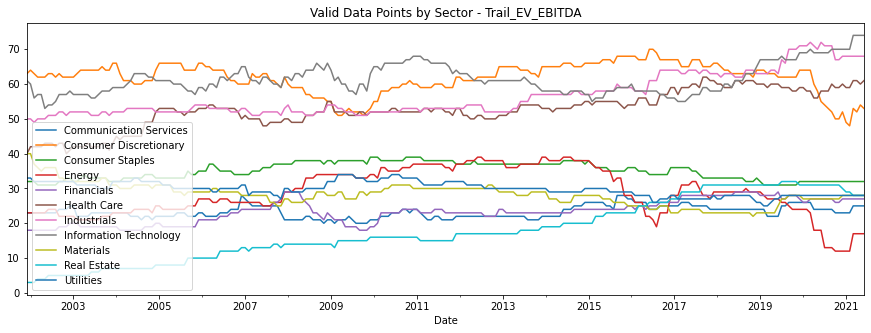

In [14]:
df = deeperDive_df.copy()

#print(df.columns.to_list())
feature = 'Trail_EV_EBITDA'
cols = ['Date', 'Ticker', 'Name', 'Sector',]

df['Count of Valid Data Points'] = df.apply(lambda x: 1 if (~np.isnan(x[feature])) else 0, axis=1)

df = df.groupby(by=['Date','Sector'])['Count of Valid Data Points'].sum().reset_index()
#display(df)

df = df.pivot(index = 'Date', columns='Sector', values='Count of Valid Data Points')
#display(df)
display(pd.DataFrame(df.mean(), columns=['Avg. # Valid Data Points by Sector- {}'.format(feature)]))

df.plot( figsize=(15,5),  title='Valid Data Points by Sector - {}'.format(feature)).legend(loc='lower left');

#### NetDebt_EBITDA

,Avg. # Valid Data Points by Sector- NetDebt_EBITDA
Sector,
Communication Services,23.204255
Consumer Discretionary,61.659574
Consumer Staples,34.923404
Energy,29.063830
Financials,23.361702
Health Care,53.127660
Industrials,56.417021
Information Technology,61.931915
Materials,28.170213


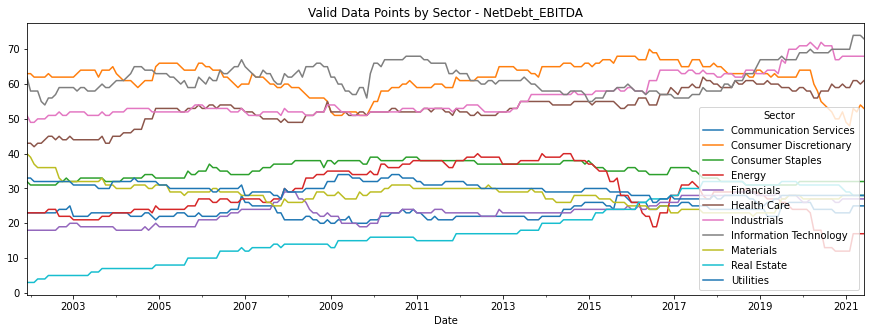

In [15]:
df = deeperDive_df.copy()

#print(df.columns.to_list())
feature = 'NetDebt_EBITDA'
cols = ['Date', 'Ticker', 'Name', 'Sector',]

df['Count of Valid Data Points'] = df.apply(lambda x: 1 if (~np.isnan(x[feature])) else 0, axis=1)

df = df.groupby(by=['Date','Sector'])['Count of Valid Data Points'].sum().reset_index()
#display(df)

df = df.pivot(index = 'Date', columns='Sector', values='Count of Valid Data Points')
#display(df)
display(pd.DataFrame(df.mean(), columns=['Avg. # Valid Data Points by Sector- {}'.format(feature)]))

df.plot( figsize=(15,5), title='Valid Data Points by Sector - {}'.format(feature));

#### Trail3yrAvg_EPSgro

,Avg. # Valid Data Points by Sector- Trail3yrAvg_EPSgro
Sector,
Communication Services,20.634043
Consumer Discretionary,57.557447
Consumer Staples,34.710638
Energy,24.157447
Financials,58.008511
Health Care,52.195745
Industrials,55.608511
Information Technology,54.059574
Materials,25.038298


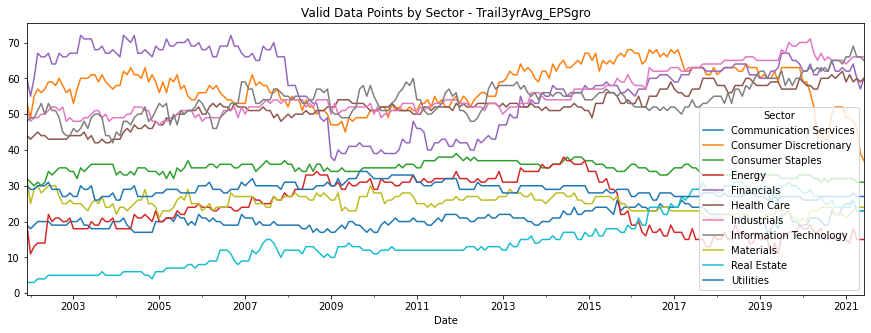

In [16]:
df = deeperDive_df.copy()

#print(df.columns.to_list())
feature = 'Trail3yrAvg_EPSgro'
cols = ['Date', 'Ticker', 'Name', 'Sector',]

df['Count of Valid Data Points'] = df.apply(lambda x: 1 if (~np.isnan(x[feature])) else 0, axis=1)

df = df.groupby(by=['Date','Sector'])['Count of Valid Data Points'].sum().reset_index()
#display(df)

df = df.pivot(index = 'Date', columns='Sector', values='Count of Valid Data Points')
#display(df)
display(pd.DataFrame(df.mean(), columns=['Avg. # Valid Data Points by Sector- {}'.format(feature)]))

df.plot( figsize=(15,5), title='Valid Data Points by Sector - {}'.format(feature));

## Median Replacement 

In [17]:
### Sector Median NaN Plugging Method

### Start by making a df containing the median of all columns
median_df = filled_df.copy().groupby(['Date','Sector']).median().reset_index(drop=False)
display(median_df)


,Date,Sector,Price,Price_Returns_12m,Price_Returns_6m,Price_Returns_3m,Price_Returns_1m,Moving_Avg_Returns_12m,Moving_Avg_Returns_6m,Moving_Avg_Returns_3m,...,PB,Trail_EV_EBITDA,Trail_PE,Trail3yrAvg_EPSgro,Trail3yrAvg_DPSgro,Volatility,Debt_to_MktCap,NetDebt_EBITDA,Trail1yr_EPSgro,Trail1yr_DPSgro
0,2001-12-31,Communication Services,37.31155,-0.020303,-0.049024,0.111736,0.025988,0.002793,0.001152,0.036958,...,3.49470,12.82890,30.7301,6.02950,0.67945,45.2870,0.2832,2.40240,-34.536082,0.001467
1,2001-12-31,Consumer Discretionary,22.32380,0.194302,0.054195,0.280327,0.063037,0.021923,0.018187,0.088836,...,2.81665,8.96270,22.9750,11.03170,0.00000,45.5060,0.2791,1.51430,-3.794643,0.000000
2,2001-12-31,Consumer Staples,29.87000,-0.005436,0.079560,0.051108,0.020000,0.000298,0.015212,0.018466,...,5.34340,11.90445,22.7299,9.63895,5.00000,30.6320,0.1618,1.51045,4.265499,4.740118
3,2001-12-31,Energy,23.75240,-0.197069,-0.053434,0.125249,0.081354,-0.012372,0.001731,0.040408,...,1.80105,6.35570,11.4973,143.49210,0.00000,45.3980,0.3750,1.57420,1.738191,0.001439
4,2001-12-31,Financials,34.10000,-0.050241,-0.059625,0.044783,0.033614,-0.001278,-0.006888,0.018528,...,2.16800,11.50845,16.0700,11.88615,9.49915,34.1465,0.8157,3.15485,1.035178,8.647215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,2021-06-30,Industrials,139.70500,0.503462,0.168546,0.042866,-0.020162,0.036715,0.031170,0.015073,...,5.42590,17.13630,28.9312,11.15675,6.05465,27.2030,0.1744,1.48495,14.633581,4.825570
2581,2021-06-30,Information Technology,167.83500,0.469501,0.139344,0.070648,0.029799,0.032818,0.023956,0.023917,...,9.83890,20.80560,37.4845,15.17600,3.43420,32.4025,0.0685,0.30480,15.611900,2.088692
2582,2021-06-30,Materials,105.53500,0.635259,0.171326,0.034607,-0.047103,0.045511,0.029250,0.012243,...,3.73455,16.07925,23.2241,11.79170,6.17345,30.9130,0.2192,2.39090,2.726393,3.316517
2583,2021-06-30,Real Estate,114.59000,0.365721,0.281116,0.135725,0.019156,0.029427,0.042610,0.044350,...,3.00075,24.20755,68.6946,6.15430,2.81780,29.9875,0.3315,6.25695,-8.670414,1.957556


In [18]:
### Function to replace an NaN using the correct Date / Sector combination

def median_replacement(date, sector, feature, median_df):
    
    return median_df[(median_df['Date'] == date) & (median_df['Sector'] == sector)][feature].values[0]
    

#display(median_replacement(date='2021-06-30', sector='Utilities', feature='Trail_EV_EBITDA', median_df=median_df))

In [19]:
%%time

### Loop that applies the median replacement function
clean_df = filled_df.copy()

feature_list = ['Price_Returns_12m', 'Price_Returns_6m', 'Price_Returns_3m', 'Price_Returns_1m', 'Moving_Avg_Returns_12m', 'Moving_Avg_Returns_6m', 'Moving_Avg_Returns_3m', 'Trail_DivYld', 'PB', 'Trail_EV_EBITDA', 'Trail_PE', 'Trail3yrAvg_EPSgro', 'Trail3yrAvg_DPSgro', 'Volatility', 'Debt_to_MktCap', 'NetDebt_EBITDA', 'Trail1yr_EPSgro', 'Trail1yr_DPSgro'] #['Trail3yrAvg_EPSgro']#

for feature in feature_list:
    print('Starting Median Plug for...',feature)
    clean_df[feature] = clean_df.apply(lambda x: median_replacement(date=x.Date, sector=x.Sector, feature=feature, median_df=median_df) if np.isnan(x[feature]) else 
                                           x[feature], 
                                           axis=1)

#display(clean_df[clean_df['Trail_EV_EBITDA'].isna()][['Date','Sector','Price','Trail_EV_EBITDA']])
#display(clean_df.isna().sum())

Starting Median Plug for... Price_Returns_12m
Starting Median Plug for... Price_Returns_6m
Starting Median Plug for... Price_Returns_3m
Starting Median Plug for... Price_Returns_1m
Starting Median Plug for... Moving_Avg_Returns_12m
Starting Median Plug for... Moving_Avg_Returns_6m
Starting Median Plug for... Moving_Avg_Returns_3m
Starting Median Plug for... Trail_DivYld
Starting Median Plug for... PB
Starting Median Plug for... Trail_EV_EBITDA
Starting Median Plug for... Trail_PE
Starting Median Plug for... Trail3yrAvg_EPSgro
Starting Median Plug for... Trail3yrAvg_DPSgro
Starting Median Plug for... Volatility
Starting Median Plug for... Debt_to_MktCap
Starting Median Plug for... NetDebt_EBITDA
Starting Median Plug for... Trail1yr_EPSgro
Starting Median Plug for... Trail1yr_DPSgro
CPU times: user 1min 34s, sys: 1.62 s, total: 1min 36s
Wall time: 1min 37s


In [20]:
### Check that no more NaN's exist
display(clean_df.isna().sum())

Date                      0
Ticker                    0
Name                      0
Sector                    0
Price                     0
Price_Returns_12m         0
Price_Returns_6m          0
Price_Returns_3m          0
Price_Returns_1m          0
Moving_Avg_Returns_12m    0
Moving_Avg_Returns_6m     0
Moving_Avg_Returns_3m     0
Trail_DivYld              0
PB                        0
Trail_EV_EBITDA           0
Trail_PE                  0
Trail3yrAvg_EPSgro        0
Trail3yrAvg_DPSgro        0
Volatility                0
Debt_to_MktCap            0
NetDebt_EBITDA            0
Trail1yr_EPSgro           0
Trail1yr_DPSgro           0
dtype: int64

## Look at the Export dataframe before exporting

In [21]:
export_df = clean_df.copy()

print(export_df.columns.to_list())

['Date', 'Ticker', 'Name', 'Sector', 'Price', 'Price_Returns_12m', 'Price_Returns_6m', 'Price_Returns_3m', 'Price_Returns_1m', 'Moving_Avg_Returns_12m', 'Moving_Avg_Returns_6m', 'Moving_Avg_Returns_3m', 'Trail_DivYld', 'PB', 'Trail_EV_EBITDA', 'Trail_PE', 'Trail3yrAvg_EPSgro', 'Trail3yrAvg_DPSgro', 'Volatility', 'Debt_to_MktCap', 'NetDebt_EBITDA', 'Trail1yr_EPSgro', 'Trail1yr_DPSgro']


In [22]:
### Look at the export dataframe
column_order = [ 'Date', 'Ticker', 'Name', 'Sector', 'Price', 'Price_Returns_12m', 'Price_Returns_6m', 'Price_Returns_3m', 'Price_Returns_1m',  'Moving_Avg_Returns_12m', 'Moving_Avg_Returns_6m', 'Moving_Avg_Returns_3m','Trail_DivYld', 'PB', 'Trail_EV_EBITDA', 'Trail_PE', 'Trail3yrAvg_EPSgro', 'Trail3yrAvg_DPSgro', 'Volatility', 'Debt_to_MktCap', 'NetDebt_EBITDA', 'Trail1yr_EPSgro', 'Trail1yr_DPSgro',]

export_df = export_df[column_order].copy()
export_df

,Date,Ticker,Name,Sector,Price,Price_Returns_12m,Price_Returns_6m,Price_Returns_3m,Price_Returns_1m,Moving_Avg_Returns_12m,...,PB,Trail_EV_EBITDA,Trail_PE,Trail3yrAvg_EPSgro,Trail3yrAvg_DPSgro,Volatility,Debt_to_MktCap,NetDebt_EBITDA,Trail1yr_EPSgro,Trail1yr_DPSgro
0,2001-12-31,DVN,DEVON ENERGY CO,Energy,19.325,-0.363316,-0.261843,0.125249,0.125576,-0.030736,...,1.4963,5.1606,7.6535,130.3853,0.0000,46.065,1.3529,2.78700,-12.173913,0.016076
1,2001-12-31,DLX,DELUXE CORP,Industrials,41.580,1.163046,0.468887,0.215451,0.052126,0.067696,...,33.9083,7.4741,15.2868,8.3752,0.0000,25.321,0.0585,0.40300,20.353982,-0.000344
2,2001-12-31,WOR,WORTHINGTON INDS,Materials,14.200,0.858094,0.068259,0.276804,-0.029457,0.060837,...,1.8777,10.6310,26.2963,10.3571,5.1814,50.551,0.2466,2.02970,-33.333333,1.585745
3,2001-12-31,502466Q,WELLPOINT HEALTH,Health Care,58.425,0.013883,0.239919,0.070545,-0.008906,0.004295,...,3.5022,3.6911,18.5182,18.8340,0.0000,38.079,0.1125,-4.31070,19.281664,0.000000
4,2001-12-31,TNB,ABB INSTALLATION,Industrials,21.150,0.343641,-0.041686,0.209954,0.036257,0.030430,...,1.8002,28.7558,21.5716,1.2706,-9.1440,40.399,0.5464,7.34080,-666.666667,-25.000384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113313,2021-06-30,CAT,CATERPILLAR INC,Industrials,217.630,0.761033,0.207364,-0.057212,-0.097271,0.050253,...,7.1930,17.1504,28.9312,11.3307,9.7103,29.043,0.3203,-0.09600,-8.884663,-0.000606
113314,2021-06-30,BA,BOEING CO/THE,Industrials,239.560,0.306928,0.119126,-0.059516,-0.030200,0.033708,...,5.4259,17.1363,28.9312,-51.6859,0.0000,46.282,0.4538,1.48495,-1017.543264,-100.000000
113315,2021-06-30,AVGO,BROADCOM INC,Information Technology,476.840,0.561110,0.105814,0.036395,0.017371,0.039096,...,9.6650,17.2061,40.4239,23.7943,30.8588,30.250,0.2067,2.39970,79.762268,13.307170
113316,2021-06-30,HPQ,HP INC,Information Technology,30.190,0.784808,0.243512,-0.043076,0.039423,0.054327,...,9.8389,8.3812,10.0154,10.3833,11.2247,31.150,0.2017,0.72680,26.125523,9.986824


In [23]:
### Check that no more NaN's exist
display(export_df.isna().sum())

Date                      0
Ticker                    0
Name                      0
Sector                    0
Price                     0
Price_Returns_12m         0
Price_Returns_6m          0
Price_Returns_3m          0
Price_Returns_1m          0
Moving_Avg_Returns_12m    0
Moving_Avg_Returns_6m     0
Moving_Avg_Returns_3m     0
Trail_DivYld              0
PB                        0
Trail_EV_EBITDA           0
Trail_PE                  0
Trail3yrAvg_EPSgro        0
Trail3yrAvg_DPSgro        0
Volatility                0
Debt_to_MktCap            0
NetDebt_EBITDA            0
Trail1yr_EPSgro           0
Trail1yr_DPSgro           0
dtype: int64

In [24]:
# ### export to Google Drive

# export_df.to_csv("/content/gdrive/Shareddrives/Milestone2/SP500_Index_Data_for_Projects.csv", index=False)

# MinMax Scaling of X-Features for Export


In [25]:

### MinMax Scalar that normalizes data by Month

def monthly_minmax_scalar(df, feature_list):

    starting_col_list = [i for i in df.columns.to_list() if i not in feature_list]
    #print(starting_col_list)
    output_df = df[starting_col_list].copy()
    #display(starting_df)

    for feature in feature_list:  #[0:1]:
        print('scaling...', feature)
        temp_col_list = starting_col_list.copy()
        temp_col_list.append(feature)
        temp_df = df[temp_col_list].copy()
        temp_df['min'] = temp_df.groupby(['Date'],axis=0)[feature].transform('min')
        temp_df['max'] = temp_df.groupby(['Date'],axis=0)[feature].transform('max')
        #display(temp_df)
        temp_df[feature] = temp_df.apply(lambda x:  round(( x[feature] - x['min'] ) / (x['max']- x['min']), 5) , axis=1)
        temp_df.drop(['min','max'], axis=1, inplace=True)                
       
        #display(df[df.Date=='2020-12-31'][temp_col_list].sort_values(by=[feature]))
        #display(temp_df[temp_df.Date=='2020-12-31'].sort_values(by=[feature]))
        
        #display(temp_df.describe())

        output_df = output_df.merge(temp_df, how='left', on=starting_col_list)
        
    return output_df

In [26]:
#%%time
### Create scaled minmax dataframe USING !! EXPORT_DF !!

X_features_columns = ['Price_Returns_12m', 'Price_Returns_6m', 'Price_Returns_3m', 'Price_Returns_1m', 'Moving_Avg_Returns_12m', 'Moving_Avg_Returns_6m', 'Moving_Avg_Returns_3m', 'Trail_DivYld', 'PB', 'Trail_EV_EBITDA', 'Trail_PE', 'Trail3yrAvg_EPSgro', 'Trail3yrAvg_DPSgro', 'Volatility', 'Debt_to_MktCap', 'NetDebt_EBITDA', 'Trail1yr_EPSgro', 'Trail1yr_DPSgro']

X_custom_minmax = monthly_minmax_scalar(df=export_df, feature_list=X_features_columns)

### drop 'Price' as it is not normalized and not going to be used
X_custom_minmax.drop(['Price'], axis=1, inplace=True)

### view .describe()
display(X_custom_minmax[X_features_columns].describe())

scaling... Price_Returns_12m
scaling... Price_Returns_6m
scaling... Price_Returns_3m
scaling... Price_Returns_1m
scaling... Moving_Avg_Returns_12m
scaling... Moving_Avg_Returns_6m
scaling... Moving_Avg_Returns_3m
scaling... Trail_DivYld
scaling... PB
scaling... Trail_EV_EBITDA
scaling... Trail_PE
scaling... Trail3yrAvg_EPSgro
scaling... Trail3yrAvg_DPSgro
scaling... Volatility
scaling... Debt_to_MktCap
scaling... NetDebt_EBITDA
scaling... Trail1yr_EPSgro
scaling... Trail1yr_DPSgro


,Price_Returns_12m,Price_Returns_6m,Price_Returns_3m,Price_Returns_1m,Moving_Avg_Returns_12m,Moving_Avg_Returns_6m,Moving_Avg_Returns_3m,Trail_DivYld,PB,Trail_EV_EBITDA,Trail_PE,Trail3yrAvg_EPSgro,Trail3yrAvg_DPSgro,Volatility,Debt_to_MktCap,NetDebt_EBITDA,Trail1yr_EPSgro,Trail1yr_DPSgro
count,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000,113318.000000
mean,0.329818,0.391775,0.420974,0.448644,0.506457,0.482538,0.465887,0.080414,0.021621,0.046005,0.033884,0.210311,0.294645,0.234299,0.033442,0.340310,0.531918,0.135427
std,0.156026,0.163648,0.161060,0.164830,0.170981,0.168172,0.164445,0.110109,0.061913,0.072773,0.069434,0.201476,0.126053,0.161099,0.080727,0.244552,0.279735,0.112504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217800,0.275672,0.307853,0.335470,0.388712,0.365133,0.352510,0.009540,0.002853,0.011780,0.007760,0.056170,0.210880,0.118060,0.004420,0.141750,0.279500,0.054460
50%,0.316550,0.388910,0.412165,0.444060,0.510780,0.488050,0.459340,0.047920,0.008730,0.027700,0.016580,0.134825,0.282425,0.196495,0.011640,0.301365,0.525840,0.102710
75%,0.423790,0.500660,0.525950,0.555697,0.629818,0.600905,0.575427,0.103430,0.021130,0.055740,0.036350,0.311460,0.344830,0.309358,0.031260,0.470630,0.782320,0.203578
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
### view the data
X_custom_minmax

,Date,Ticker,Name,Sector,Price_Returns_12m,Price_Returns_6m,Price_Returns_3m,Price_Returns_1m,Moving_Avg_Returns_12m,Moving_Avg_Returns_6m,...,PB,Trail_EV_EBITDA,Trail_PE,Trail3yrAvg_EPSgro,Trail3yrAvg_DPSgro,Volatility,Debt_to_MktCap,NetDebt_EBITDA,Trail1yr_EPSgro,Trail1yr_DPSgro
0,2001-12-31,DVN,DEVON ENERGY CO,Energy,0.14293,0.36564,0.31219,0.59225,0.41990,0.53320,...,0.01075,0.00267,0.00631,0.41488,0.27215,0.26616,0.08911,0.07375,0.03595,0.25038
1,2001-12-31,DLX,DELUXE CORP,Industrials,0.52246,0.75964,0.34187,0.50767,0.82239,0.77190,...,0.30390,0.00451,0.01589,0.33726,0.27215,0.10534,0.00385,0.07084,0.03749,0.25034
2,2001-12-31,WOR,WORTHINGTON INDS,Materials,0.44664,0.54363,0.36205,0.41371,0.79434,0.66102,...,0.01420,0.00702,0.02970,0.33852,0.30140,0.30094,0.01624,0.07282,0.03495,0.25431
3,2001-12-31,502466Q,WELLPOINT HEALTH,Health Care,0.23672,0.63619,0.29420,0.43738,0.56314,0.70571,...,0.02889,0.00151,0.01994,0.34392,0.27215,0.20425,0.00741,0.06508,0.03744,0.25034
4,2001-12-31,TNB,ABB INSTALLATION,Industrials,0.31872,0.48435,0.34006,0.48939,0.67000,0.61609,...,0.01350,0.02142,0.02377,0.33274,0.22053,0.22224,0.03599,0.07931,0.00503,0.18776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113313,2021-06-30,CAT,CATERPILLAR INC,Industrials,0.25823,0.34131,0.29871,0.12562,0.43077,0.41464,...,0.02136,0.11235,0.00514,0.03176,0.19563,0.23581,0.06008,0.58198,0.20723,0.00999
113314,2021-06-30,BA,BOEING CO/THE,Industrials,0.14828,0.27276,0.29580,0.27529,0.33805,0.35152,...,0.01568,0.11225,0.00514,0.01586,0.17359,0.52968,0.08512,0.60869,0.00000,0.00000
113315,2021-06-30,AVGO,BROADCOM INC,Information Technology,0.20982,0.26242,0.41676,0.38145,0.36825,0.31303,...,0.02930,0.11276,0.00779,0.03490,0.24362,0.25638,0.03877,0.62414,0.22545,0.01132
113316,2021-06-30,HPQ,HP INC,Information Technology,0.26399,0.36939,0.31654,0.43065,0.45360,0.45301,...,0.02986,0.04868,0.00079,0.03152,0.19907,0.27173,0.03783,0.59588,0.21443,0.01099


# EXPORT THE FILE

In [28]:
# ### export to Google Drive

# X_custom_minmax.to_csv("/content/gdrive/Shareddrives/Milestone2/SP500_Index_Normalized_Features.csv", index=False)

### Scratchpad area for viewing the data

In [29]:
#print(export_df.columns.to_list())